<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [150]:
data = pd.read_csv('content/game_of_thrones_train.csv', index_col='S.No')
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


Посмотрите, какие типы данных представлены в нашем датасете

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [4]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [5]:
data.describe(include = ['float64','int64']).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [6]:
data.isna().sum(axis=0)

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

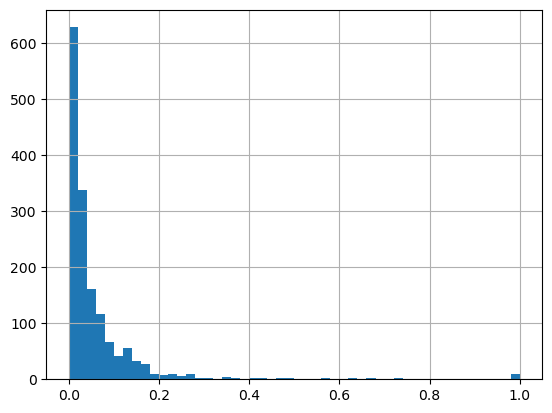

In [7]:
hist = data['popularity'].hist(bins=50)

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


<Axes: >

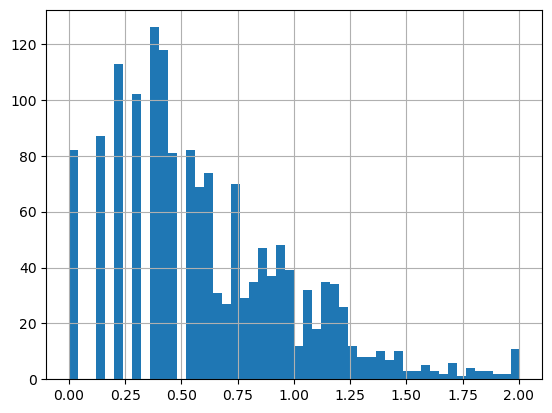

In [8]:
data['popularity'] = np.log10(data['popularity'] * 100 + 1)
data['popularity'].hist(bins=50)

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

In [10]:
data['numDeadRelations'].value_counts()

numDeadRelations
0     1488
1       24
5       10
7        7
4        7
3        4
10       4
2        4
6        3
8        2
12       1
11       1
15       1
9        1
Name: count, dtype: int64

In [11]:
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)
data['boolDeadRelations'].value_counts()

boolDeadRelations
0    1488
1      69
Name: count, dtype: int64

In [12]:
data['age'].value_counts()

age
100.0    20
19.0     12
15.0     11
16.0     11
20.0     11
         ..
33.0      1
86.0      1
80.0      1
58.0      1
77.0      1
Name: count, Length: 72, dtype: int64

In [14]:
data['age_value'] = data['age'].fillna(0)
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

In [15]:
data['age_value'].value_counts()

age_value
0.0      1280
100.0      20
19.0       12
16.0       11
20.0       11
         ... 
33.0        1
86.0        1
80.0        1
58.0        1
77.0        1
Name: count, Length: 72, dtype: int64

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [16]:
data['culture'].value_counts(dropna=False)

culture
NaN                        1069
Northmen                     94
Ironborn                     91
Free Folk                    45
Braavosi                     39
Valyrian                     28
Ghiscari                     17
Dornish                      17
Dothraki                     17
Reach                        13
Vale mountain clans          12
Rivermen                     10
Valemen                      10
northmen                      9
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Stormlands                    4
Summer Isles                  4
Astapori                      4
Westeros                      3
Dornishmen                    3
Ironmen                       3
Northern mountain clans       3
Westermen                     3
Lysene                        2
westermen                     2
Meereenese                    2
Myrish                        2
Crannogmen                    2


In [17]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [18]:
# По аналогии с примером выше инвертируйте словарь cultures_grouped
cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
    for v in cultures_grouped[k]:
        cultures_grouped_inverted.update({v:k})
        
cultures_grouped_inverted

{'valyrian': 'Old Nations',
 'first men': 'Old Nations',
 'andal': 'Old Nations',
 'andals': 'Old Nations',
 'rhoynar': 'Old Nations',
 'northmen': 'the North',
 'northern mountain clans': 'the North',
 'crannogmen': 'the North',
 'ironborn': 'the Iron Islands',
 'ironmen': 'the Iron Islands',
 'valemen': 'the Mountain and the Vale',
 'vale': 'the Mountain and the Vale',
 'vale mountain clans': 'the Mountain and the Vale',
 'sistermen': 'the Mountain and the Vale',
 'riverlands': 'the Isles and Rivers',
 'rivermen': 'the Isles and Rivers',
 'westerman': 'the Rock',
 'westermen': 'the Rock',
 'westerlands': 'the Rock',
 'stormlander': 'the Stormlands',
 'stormlands': 'the Stormlands',
 'reach': 'the Reach',
 'reachmen': 'the Reach',
 'the reach': 'the Reach',
 'dornish': 'Dorne',
 'dornishmen': 'Dorne',
 'dorne': 'Dorne',
 'astapor': 'Essos Nations',
 'astapori': 'Essos Nations',
 'braavosi': 'Essos Nations',
 'braavos': 'Essos Nations',
 'tyroshi': 'Essos Nations',
 'lysene': 'Essos Na

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [19]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)

In [22]:
np.unique(data['culture_grouped'])

array(['Dorne', 'Essos Nations', 'Old Nations', 'Other Nations',
       'culture_no_data', 'the Iron Islands', 'the Isles and Rivers',
       'the Mountain and the Vale', 'the North', 'the Reach', 'the Rock',
       'the Stormlands'], dtype=object)

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [21]:
data['culture_grouped']=data['culture_grouped'].fillna('culture_no_data')

In [23]:
data['culture_grouped'].value_counts()

culture_grouped
culture_no_data              1069
Essos Nations                 109
the North                     108
the Iron Islands               95
Other Nations                  57
Old Nations                    32
the Mountain and the Vale      25
Dorne                          21
the Rock                       14
the Reach                      13
the Isles and Rivers           10
the Stormlands                  4
Name: count, dtype: int64

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

In [24]:
# Количество уникальнх значений в каждом столбце
data.nunique()

name                 1557
title                 195
male                    2
culture                51
dateOfBirth           105
mother                 16
father                 19
heir                   20
house                 315
spouse                186
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    72
numDeadRelations       14
popularity            117
isAlive                 2
boolDeadRelations       2
age_value              72
age_no_data             2
culture_grouped        12
dtype: int64

In [25]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = ['float64','int64']).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

,count,min,max,N_unique_values
male,1557.0,0.0,1.000000,2
dateOfBirth,279.0,-25.0,299.000000,105
book1,1557.0,0.0,1.000000,2
book2,1557.0,0.0,1.000000,2
book3,1557.0,0.0,1.000000,2
book4,1557.0,0.0,1.000000,2
book5,1557.0,0.0,1.000000,2
isAliveMother,18.0,0.0,1.000000,2
isAliveFather,22.0,0.0,1.000000,2
isAliveHeir,21.0,0.0,1.000000,2


In [40]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

data.groupby('isAliveSpouse', dropna = False)['isAlive'].mean()
# pd.pivot_table(data = data, values = 'isAlive', index = 'popularity', aggfunc=['mean', 'count'], dropna=False)

isAliveSpouse
0.0    0.619048
1.0    0.753165
NaN    0.786293
Name: isAlive, dtype: float64

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [28]:
data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive', 'boolDeadRelations', 'age_value', 'age_no_data',
       'culture_grouped'],
      dtype='object')

Обработка признака **Title**

In [29]:
np.unique(data['title'].fillna('No data'))

array(['Acorn Hall', 'Archmaester', 'Ashford', 'Banefort',
       'Big BucketThe Wull', 'Bitterbridge', 'Blackcrown', 'Blackmont',
       'Bloodrider', 'Blue Grace', 'Brightwater', 'Broad Arch', 'Brother',
       'BrotherProctor', 'Captain', 'Captain of the guard', 'Castellan',
       'CastellanCommander', 'Casterly Rock', 'Castle Lychester',
       'Cerwyn', 'Chief Undergaoler', 'Claw Isle', 'Cobblecat',
       'Coldmoat', 'Coldwater Burn', 'Commander of the Second Sons',
       'Crag', 'Crakehall', 'Cupbearer', 'Deepwood Motte', 'Dragonstone',
       'Duskendale', 'Dyre Den', 'Eastwatch-by-the-Sea', 'Eyrie',
       'Fair Isle', 'Feastfires', 'Felwood', 'First Ranger',
       'First Sword of Braavos', 'Foamdrinker', 'Ghost Hill', 'Godsgrace',
       'Golden Tooth', 'Goldengrove', 'Goldgrass', 'Good Master',
       'Goodman', 'Goodwife', 'Grand Maester', 'Grassy Vale',
       'Greenshield', 'Greenstone', 'Grey Glen', 'Gulltown',
       'Hand of the King', 'Harrenhal', 'Harridan Hill', 

In [30]:
data['title'].fillna('NoData', inplace=True)
data['isKing'] = (((data['title'].str.contains('king', case=False)) & ~ (data['title'].str.contains('lord', case=False)))| data['title'].isin(['Khal','KhalKo (formerly)'])).astype(int)
data['isQueen']=(data['title'].str.contains('queen',case=False)).astype(int)
data['isPrince']=((data['title'].str.contains('prince', case=False)) & (data['isQueen'] == 0)).astype(int)
data['isLord']=(data['title'].str.contains('lord', case=False)).astype(int)

/var/folders/d3/wmmqppc90yqd4hftyc5nm_dr0000gn/T/ipykernel_92349/3057503213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['title'].fillna('NoData', inplace=True)


Обработка признака **book**

In [86]:
data['inBooks']=data.book1+data.book2+data.book3 +data.book4+data.book5

Обработка признаков о семье

In [39]:
data['mother_info'] = data['mother'].notna().astype(int)
data['father_info'] = data['father'].notna().astype(int)
data['spouse_info'] = data['spouse'].notna().astype(int)
data['heir_info'] = data['heir'].notna().astype(int)

Обработка признака **House**

In [42]:
data.house.fillna('NoData',inplace=True)

/var/folders/d3/wmmqppc90yqd4hftyc5nm_dr0000gn/T/ipykernel_92349/1085788461.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.house.fillna('NoData',inplace=True)


In [43]:
np.unique(data.house)

array(["Alchemists' Guild", 'Antler Men', 'Band of Nine', 'Black Ears',
       'Blacks', 'Brave Companions', 'Brotherhood Without Banners',
       'Brotherhood without banners', 'Burned Men', "Chataya's brothel",
       'Citadel', "City Watch of King's Landing", 'Company of the Cat',
       'Drowned men', 'Faceless Men', 'Faith of the Seven',
       'Golden Company', 'Good Masters', 'Happy Port', 'House Allyrion',
       'House Ambrose', 'House Arryn', 'House Ashford', 'House Baelish',
       'House Ball', 'House Banefort', 'House Bar Emmon',
       'House Baratheon', 'House Baratheon of Dragonstone',
       "House Baratheon of King's Landing", 'House Beesbury',
       'House Belmore', 'House Bettley', 'House Blackbar',
       'House Blackberry', 'House Blackfyre', 'House Blackmont',
       'House Blacktyde', 'House Blackwood', 'House Blanetree',
       'House Blount', 'House Boggs', 'House Bolling', 'House Bolton',
       'House Borrell', 'House Botley', 'House Bracken', 'House Brax',

In [45]:
data.house.fillna('NoData',inplace=True)
house_death_set = data.groupby('house')['isAlive'].mean()
data['house_mean_death'] = data['house'].map(house_death_set)

Обработка признака **culture_grouped**

In [47]:
data.culture_grouped.fillna('NoData',inplace=True)

In [48]:
culture_death_set = data.groupby('culture_grouped')['isAlive'].mean()
data['culturte_mean_death'] = data['culture_grouped'].map(culture_death_set)

<Axes: >

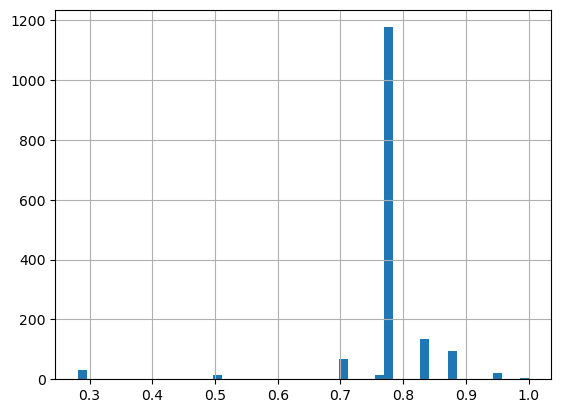

In [85]:
data['culturte_mean_death'].hist(bins=50)

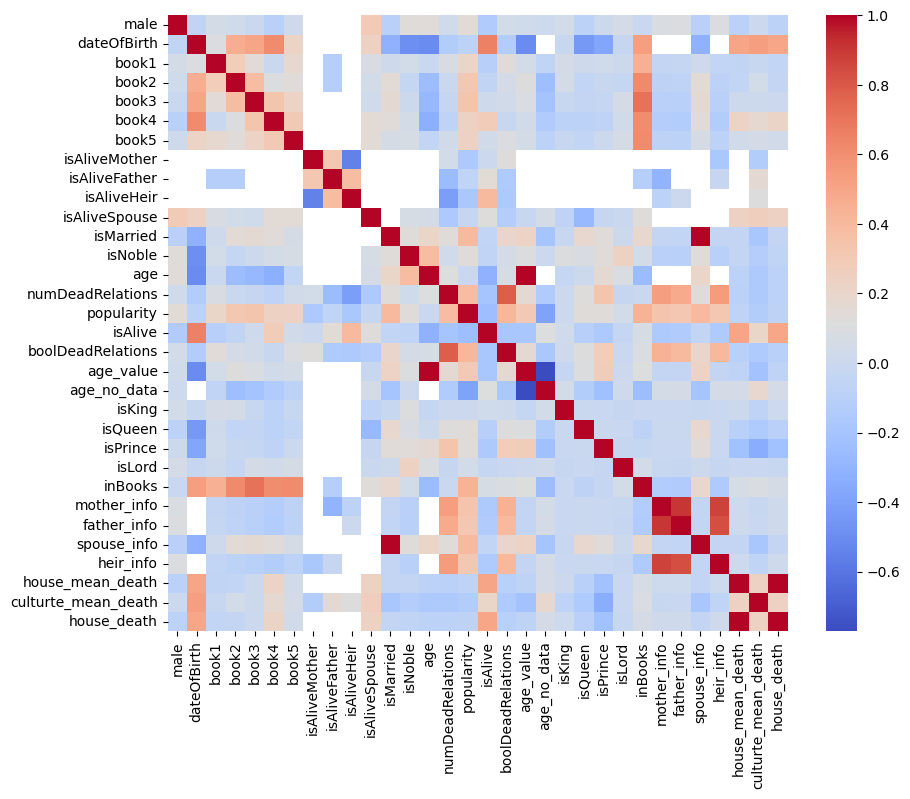

In [87]:
df_num = data.select_dtypes(exclude='object')
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,cmap='coolwarm')         

plt.show()

Убираю коррелируемые между собой признаки 

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

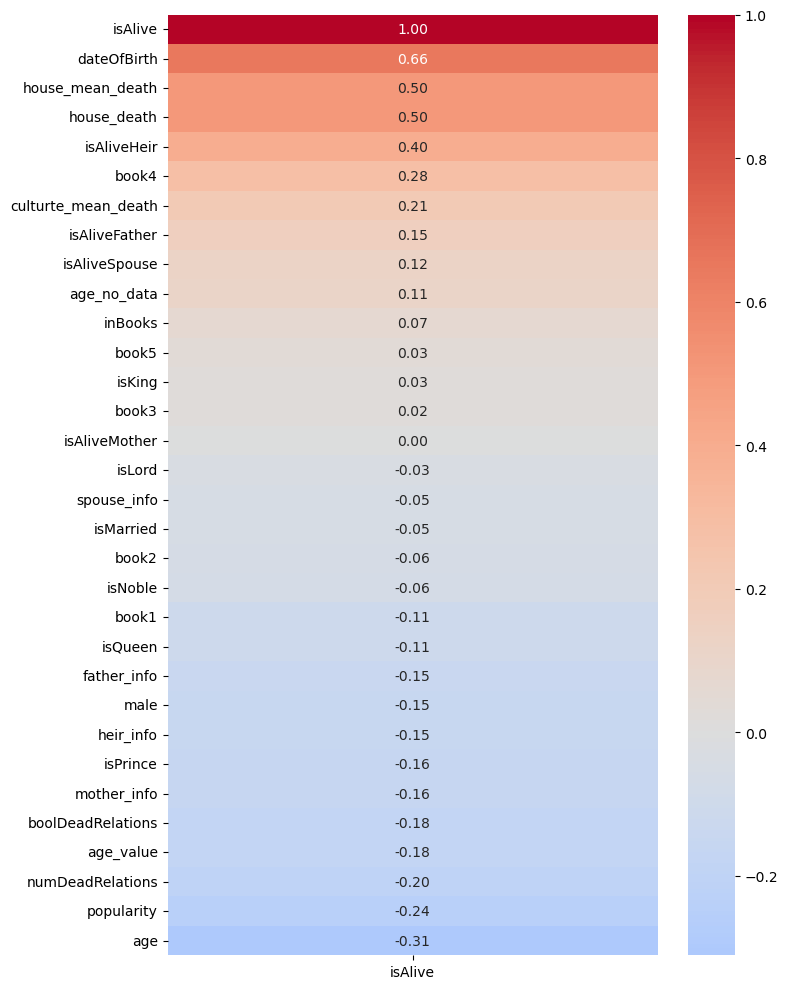

In [88]:
corr_matrix = df_num.corr()
corr_sorted = corr_matrix.sort_values('isAlive', ascending=False)
plt.figure(figsize=(8, 10))
sns.heatmap(corr_sorted[['isAlive']], 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.tight_layout()
plt.show()

In [52]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   male                 1557 non-null   int64  
 1   dateOfBirth          279 non-null    float64
 2   book1                1557 non-null   int64  
 3   book2                1557 non-null   int64  
 4   book3                1557 non-null   int64  
 5   book4                1557 non-null   int64  
 6   book5                1557 non-null   int64  
 7   isAliveMother        18 non-null     float64
 8   isAliveFather        22 non-null     float64
 9   isAliveHeir          21 non-null     float64
 10  isAliveSpouse        200 non-null    float64
 11  isMarried            1557 non-null   int64  
 12  isNoble              1557 non-null   int64  
 13  age                  279 non-null    float64
 14  numDeadRelations     1557 non-null   int64  
 15  popularity           1557 non-null   float6

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [89]:
X = data[['male',  'book5', 'isMarried', 'isNoble', 'popularity',
        'boolDeadRelations', 'age_value', 'age_no_data', 
       'isQueen', 'isPrince', 'inBooks', 'mother_info',
       'father_info', 'spouse_info', 'heir_info', 'house_mean_death',
       'culturte_mean_death']]
y = data['isAlive']

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [54]:
from sklearn.model_selection import train_test_split

In [90]:
# не забудьте в функции train_test_split задать параметр random_state,
# чтобы обеспечить повторяемость разбиения выборки на train и validation части.
# Это позволит сравнивать метрики моделей с различными методами подготовки признаков
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [56]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [91]:
#Масштабирование признаков Х
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

In [146]:
# Шаг 1. создание модели
from sklearn.linear_model import LogisticRegressionCV 
log_model = LogisticRegressionCV(max_iter=200)
# Шаг 2. обучение модели
log_model.fit(scaled_X_train,y_train)


LogisticRegressionCV(max_iter=200)

In [147]:
# Шаг 3. Предсказание на тестовых данных
y_pred = log_model.predict(scaled_X_val)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [62]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [148]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8237


Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [95]:
data_test = pd.read_csv('content/game_of_thrones_test.csv', index_col='S.No')
data_test.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [96]:
#Подсказка
data_test.loc[data_test['age']<0] # Находим данные с ошибками в дате рождения и возрасте

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,NaN,0,Lysene,278279.0,NaN,NaN,NaN,House Targaryen,NaN,...,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0.110368
1869,Rhaego,NaN,0,NaN,298299.0,NaN,NaN,NaN,House Targaryen,NaN,...,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,0.167224


In [97]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dateOfBirth'] = 278.
data_test.loc[1685, 'age'] = 0
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
data_test.loc[1869, 'dateOfBirth'] = 299.
data_test.loc[1869, 'age'] = 0
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

In [98]:
data_test.isna().sum(axis=0)

name                  0
title               168
male                  0
culture             200
dateOfBirth         235
mother              386
father              385
heir                387
house                46
spouse              313
book1                 0
book2                 0
book3                 0
book4                 0
book5                 0
isAliveMother       386
isAliveFather       385
isAliveHeir         387
isAliveSpouse       313
isMarried             0
isNoble               0
age                 235
numDeadRelations      0
popularity            0
dtype: int64

In [99]:
data_test['popularity'] = np.log10(data_test['popularity'] * 100 + 1)
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)
data_test['age_value'] = data_test['age'].fillna(0)
data_test['age_no_data'] = [1 if np.isnan(x) else 0 for x in data_test['age']]

In [100]:
data_test['culture_grouped'] = data_test['culture'].str.lower().map(cultures_grouped_inverted)
data_test['culture_grouped'] = data_test['culture_grouped'].fillna('culture_no_data')

In [115]:
data_test.describe(include = ['float64','int64']).T[['count', 'min', 'max']].assign(N_unique_values = data_test.nunique())

,count,min,max,N_unique_values
male,389.0,0.00000,1.000000,2
dateOfBirth,154.0,-28.00000,300.000000,83
book1,389.0,0.00000,1.000000,2
book2,389.0,0.00000,1.000000,2
book3,389.0,0.00000,1.000000,2
book4,389.0,0.00000,1.000000,2
book5,389.0,0.00000,1.000000,2
isAliveMother,3.0,1.00000,1.000000,1
isAliveFather,4.0,0.00000,0.000000,1
isAliveHeir,2.0,0.00000,1.000000,2


In [101]:
data_test['title'].fillna('NoData', inplace=True)
data_test['isQueen']=(data_test['title'].str.contains('queen',case=False)).astype(int)
data_test['isPrince']=((data_test['title'].str.contains('prince', case=False)) & (data_test['isQueen'] == 0)).astype(int)

/var/folders/d3/wmmqppc90yqd4hftyc5nm_dr0000gn/T/ipykernel_92349/2231410130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['title'].fillna('NoData', inplace=True)


In [102]:
data_test['inBooks']=data_test.book1+data_test.book2+data_test.book3 +data_test.book4+data_test.book5

In [103]:
data_test['mother_info'] = data_test['mother'].notna().astype(int)
data_test['father_info'] = data_test['father'].notna().astype(int)
data_test['spouse_info'] = data_test['spouse'].notna().astype(int)
data_test['heir_info']   = data_test['heir'].notna().astype(int)

In [105]:
data_test.house.fillna('NoData',inplace=True)
data_test['house_mean_death'] = data_test['house'].map(house_death_set)

In [108]:
data_test.culture_grouped.fillna('NoData', inplace=True)
data_test['culturte_mean_death'] = data_test['culture_grouped'].map(culture_death_set)

In [221]:
df_objs = pd.get_dummies(data_test.culture_grouped,drop_first=True,dtype='int64')
data_test = pd.concat([data_test,df_objs],axis=1)

In [114]:
data_test.house_mean_death.fillna(data_test.house_mean_death.mean(),inplace=True)

In [259]:
X_test.isna().sum(axis=0)

male                         0
book1                        0
book2                        0
book3                        0
book4                        0
book5                        0
isNoble                      0
popularity                   0
boolDeadRelations            0
age_value                    0
age_no_data                  0
isKing                       0
isQueen                      0
isPrince                     0
isLord                       0
isBelongHouse                0
isKnownPlace                 0
Essos Nations                0
Old Nations                  0
Other Nations                0
the Iron Islands             0
the Mountain and the Vale    0
the Rock                     0
the Stormlands               0
dtype: int64

In [119]:
X_test = data_test[['male',  'book5', 'isMarried', 'isNoble', 'popularity',
        'boolDeadRelations', 'age_value', 'age_no_data', 
       'isQueen', 'isPrince', 'inBooks', 'mother_info',
       'father_info', 'spouse_info', 'heir_info', 'house_mean_death',
       'culturte_mean_death']]

In [120]:
scaled_X_test = scaler.transform(X_test)

In [121]:
y_sub_pred = log_model.predict(scaled_X_test)

### Файл `submission.csv`

In [122]:
submission = pd.read_csv('content/submission.csv', index_col='S.No')

In [157]:
submission.isAlive=y_sub_pred
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [158]:
submission.to_csv('content/new_submission.csv', index=False)